# Basic setup

In [1]:
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from ldds.base import compute_lagrangian_descriptor
%matplotlib inline

This expressions matches the one in the Overleaf project of the students

In [2]:
def Bohmian_velocity_field(time, u, PARAMETERS=[1,1,1,0]):
    x, y = u.T
    #model parameters
    a, b, omega2, t0 = PARAMETERS
    t = time + t0
    #velocity components
    G = 1 + 2*a*x*np.cos(t) +\
        2*b*np.sqrt(omega2)*x*y*np.cos((1 + omega2)*t) +\
        (a*x)**2 +\
        2*a*b*np.sqrt(omega2)*x**2*y*np.cos(omega2*t) +\
        omega2*(b*x*y)**2
    vx = -(a*np.sin(t) + b*np.sqrt(omega2)*y*np.sin((1 + omega2)*t))/G
    vy = -b*np.sqrt(omega2)*x*(a*x*np.sin(omega2*t) + np.sin((1 + omega2)*t))/G
    
    return np.column_stack([vx, vy])

In [3]:
def Bohmian_nodal_point(t, PARAMETERS=[1,1,1]):
    #model parameters
    a, b, omega2 = PARAMETERS
    #nodal components
    x_nodal = -np.sin((1 + omega2)*t)/(a*np.sin(omega2*t))
    y_nodal = -a*np.sin(t)/(b*np.sqrt(omega2)*np.sin((1 + omega2)*t))
    
    return np.column_stack([x_nodal, y_nodal])

# Subsystems with several parameter combinations

Contopolous examples.

## Example 1: $(1, 1, 1, 1) = (a, b, \omega_1, \omega_2)$

### Nodal lines: 2D plot

In [4]:
# a, b, omega1, omega2 = (1, 1, 1, 1/np.sqrt(2))
a, b, omega1, omega2 = (1, 1, 1, 1)

In [5]:
# t_span = (0.0001, 10*np.pi/omega2); Nt = 1000
t_span = (0.0001, 10*np.pi/(omega1+omega2)); Nt = 1000
t = np.linspace(*t_span, Nt)

In [6]:
x_nodal = -np.sin(t*(omega1+omega2))/(a*np.sqrt(omega1)*np.sin(omega2*t))
y_nodal = -a*np.sin(omega1*t)/(b*np.sqrt(omega2)*np.sin(t*(omega1+omega2)))

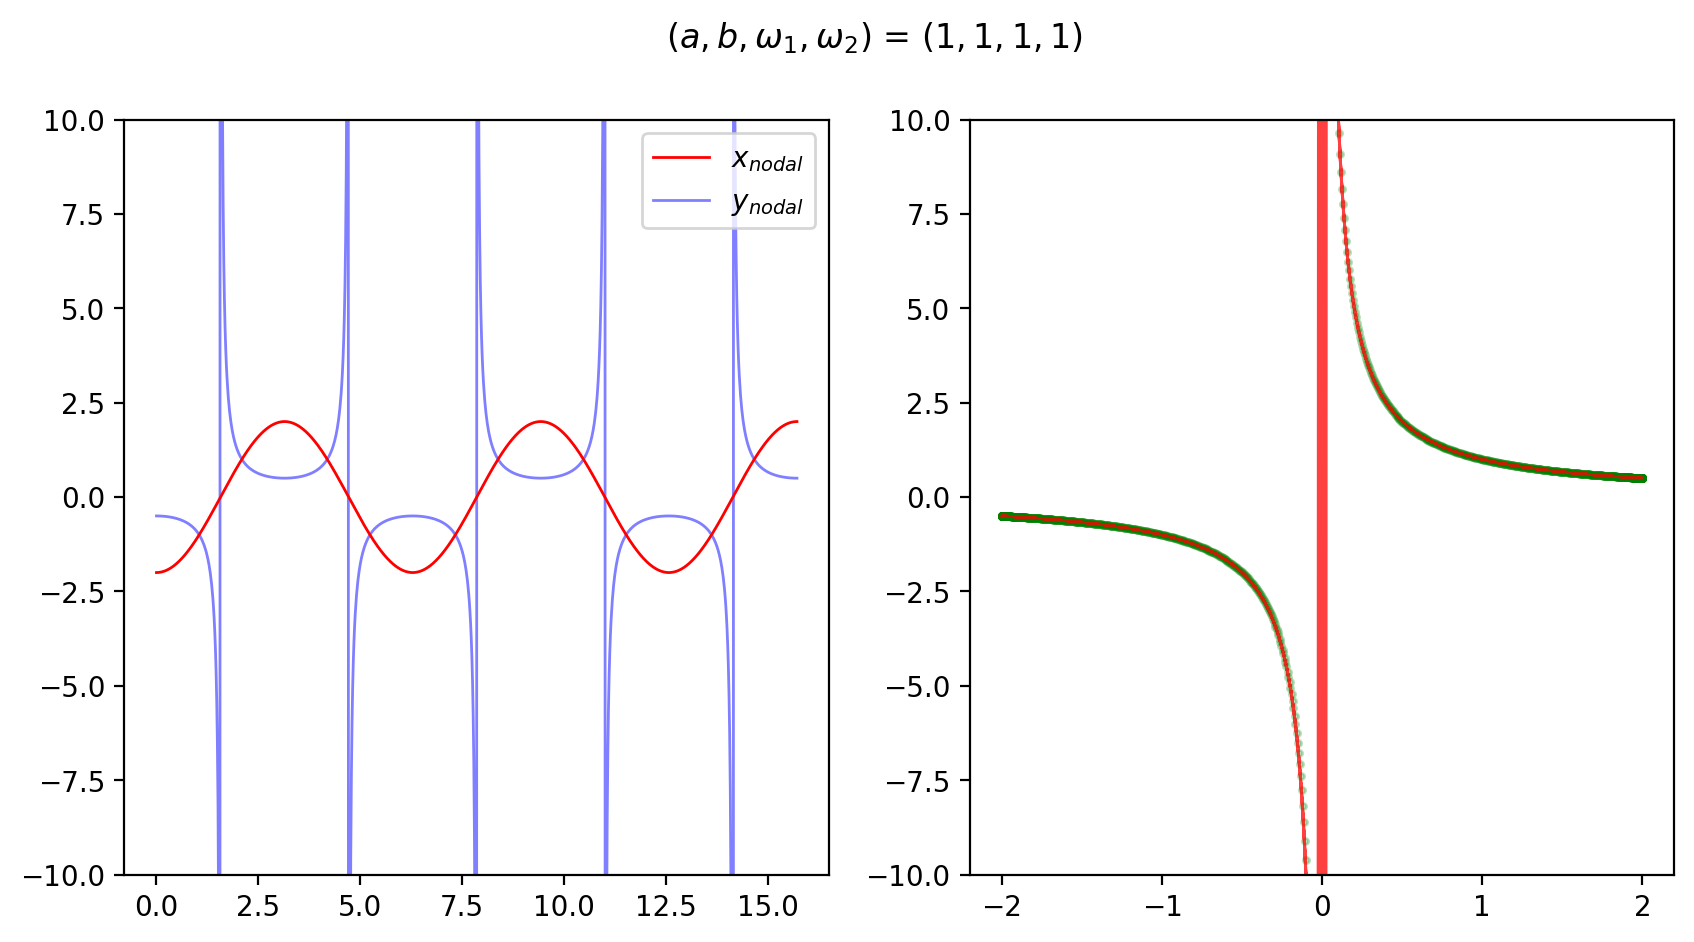

In [7]:
fig,(ax1, ax2) = plt.subplots(1,2, figsize=(10,5),dpi=200)

ax1.plot(t, x_nodal,c="red",lw=1,label="$x_{nodal}$",alpha=1)
ax1.plot(t, y_nodal,c="blue",lw=1,label="$y_{nodal}$",alpha=0.5,zorder=-10)
ax1.set_ylim(-10,10)
ax1.legend()

ax2.scatter(x_nodal, y_nodal,c="green",s=5,alpha=0.25)
ax2.plot(x_nodal, y_nodal,c="red",lw=1,alpha=0.75)
ax2.set_ylim(-10,10)

suptitle = "($a, b, \omega_1, \omega_2$) = ($"+str(a)+", "+str(b)+", "+str(omega1)+","+str(omega2)+"$)"
fig.suptitle(suptitle)

plt.show()

### Nodal lines: 3D plot

In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

<IPython.core.display.Javascript object>


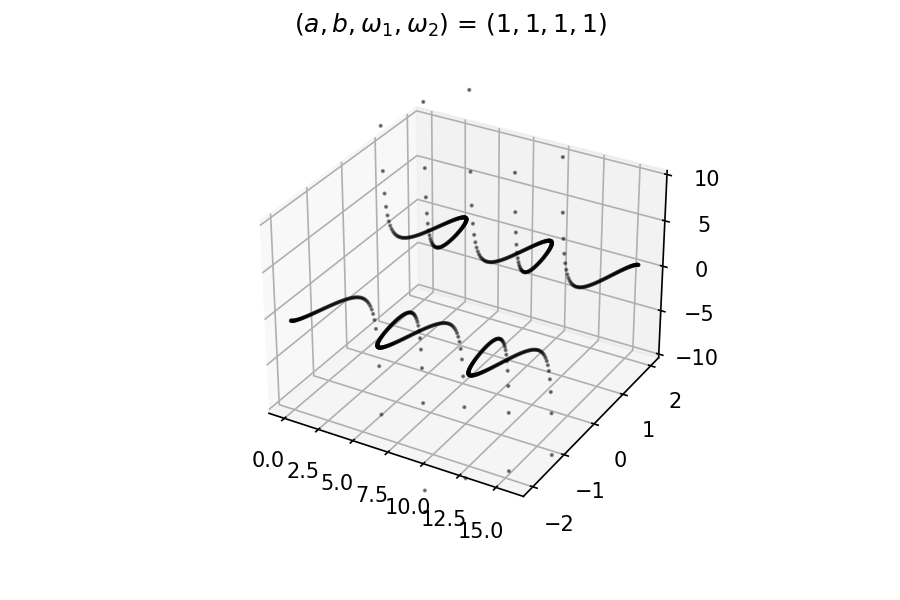

In [9]:
fig = plt.figure(dpi=150)
ax = fig.add_subplot(111, projection='3d')

# ax.plot(t, x_nodal, y_nodal, color="black", lw=1)
ax.scatter(t, x_nodal, y_nodal, color="black", s=1)
ax.set_zlim(-10,10)

suptitle = "($a, b, \omega_1, \omega_2$) = ($"+str(a)+", "+str(b)+", "+str(omega1)+","+str(omega2)+"$)"
fig.suptitle(suptitle)

plt.show()

In [10]:
%matplotlib inline

### Integrate trajectories

In [11]:
x_min,x_max,Nx = [-4, 4, 20]
y_min,y_max,Ny = [-4, 4, 20]

x = np.linspace(x_min,x_max,Nx)
y = np.linspace(y_min,y_max,Ny)

X,Y = np.meshgrid(x,y)

points = np.column_stack([X.ravel(), Y.ravel()])

In [12]:
a, b, omega2, t0 = [1, 1, 1, 0]
f = lambda t, u_flat: Bohmian_velocity_field(t, u_flat.reshape(-1,2), PARAMETERS=[a, b, omega2, t0]).flatten()

In [13]:
x0 = points.flatten()
solution = solve_ivp(f, t_span, points.flatten())
trajectory = solution.y
time_line = solution.t

In [14]:
import matplotlib.cm as cm

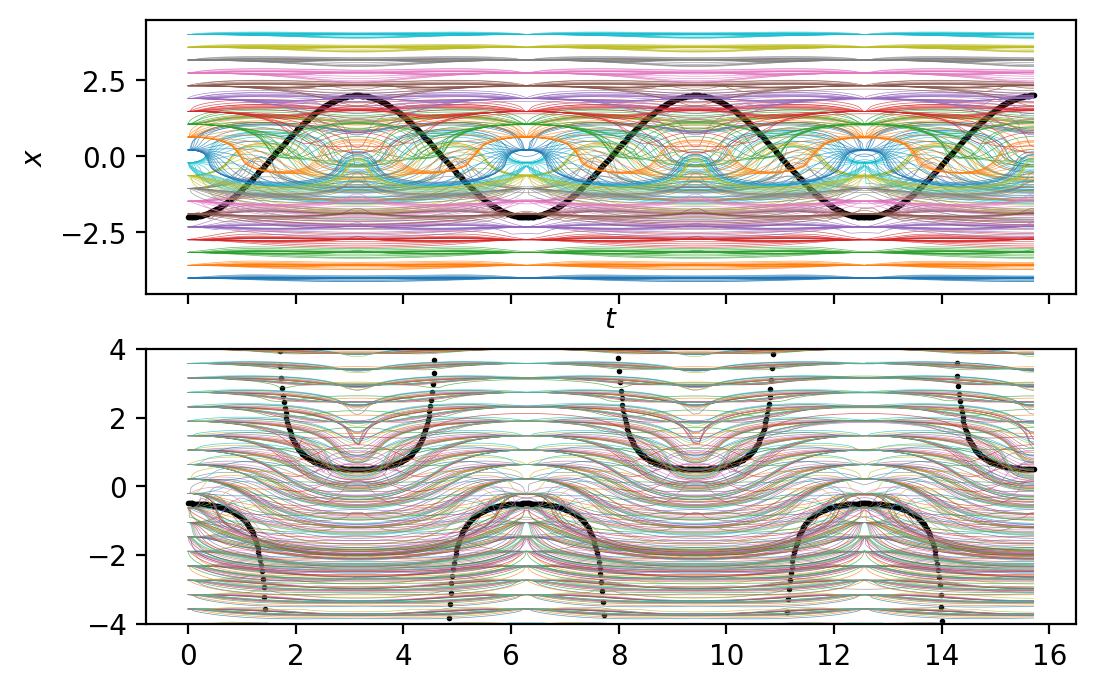

In [15]:
fig, (ax1, ax2) = plt.subplots(2,1,sharex=True,dpi=200)

for i in range(Nx*Ny-1):
    ax1.plot(time_line, trajectory[::2][i],lw=0.25, alpha=0.75)
    ax2.plot(time_line, trajectory[1::2][i],lw=0.25, alpha=0.75)
    
# ax.scatter(0, points.T[0], points.T[1], color='blue', s=10)

ax1.scatter(t, x_nodal, color="black", s=1)
ax2.scatter(t, y_nodal, color="black", s=1)

ax1.set_xlabel("$t$")
ax1.set_ylabel("$x$")

ax2.set_ylim(-4,4)

plt.show()

<IPython.core.display.Javascript object>


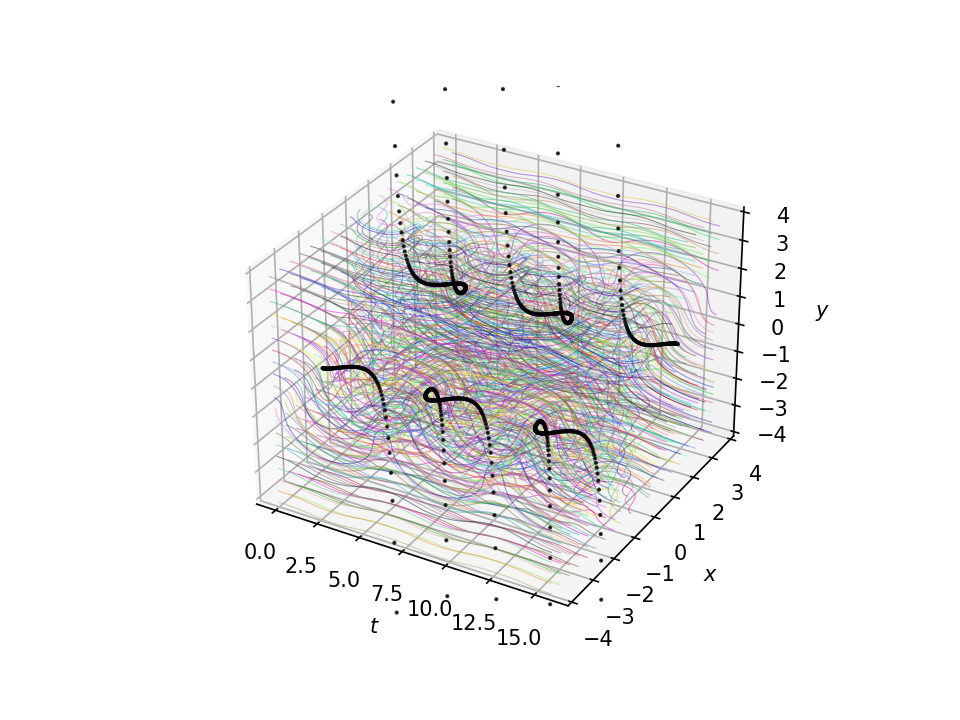

In [370]:
fig = plt.figure(dpi=150)
ax = fig.add_subplot(111, projection='3d')

for i in range(Nx*Ny-1):
    ax.plot(time_line, trajectory[::2][i], trajectory[1::2][i], color=np.random.rand(3), lw=0.5, alpha=0.5)
    
# ax.scatter(0, points.T[0], points.T[1], color='blue', s=10)

ax.scatter(t, x_nodal, y_nodal, color="black", s=1)
ax.set_zlim(-4,4)

ax.set_xlabel("$t$")
ax.set_ylabel("$x$")
ax.set_zlabel("$y$")

ax.set_ylim(-4,4)

plt.show()

In [16]:
%matplotlib inline

In [17]:
compute_arclength = lambda trajectory: np.sum(np.linalg.norm(np.gradient(np.array(trajectory).T,axis=0),axis=1))

In [18]:
TRAJECTORIES_arclength = []
for i in range(Nx*Ny):
    timeline = solution.t
    traj_x = solution.y[::2][i]
    traj_y = solution.y[1::2][i]
    trajectory = [timeline, traj_x, traj_y]
    arclength = compute_arclength(trajectory)
    TRAJECTORIES_arclength.append(arclength)

In [19]:
lds = np.array(TRAJECTORIES_arclength)
lds = (lds - lds.min())/(lds.max() - lds.min())

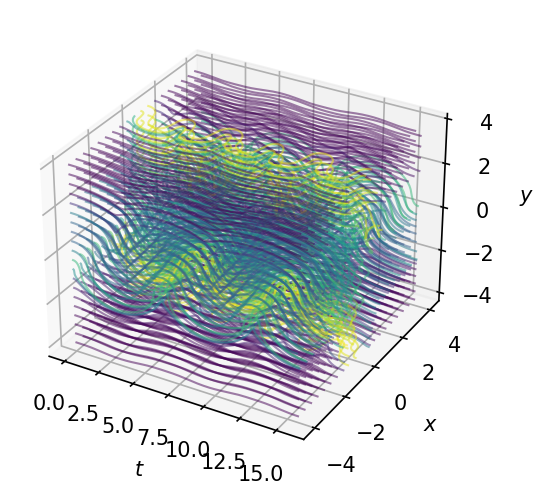

In [20]:
cmap = plt.cm.viridis

fig = plt.figure(dpi=150)
ax = fig.add_subplot(111, projection='3d')

for i in range(Nx*Ny-1):
    timeline = solution.t
    traj_x = solution.y[::2][i]
    traj_y = solution.y[1::2][i]
    ax.plot(timeline, traj_x, traj_y, c=cmap(lds[i]), lw=1, alpha=0.5)
    
# ax.scatter(t, x_nodal, y_nodal, color="black", s=1)
# ax.set_zlim(-4,4)

ax.set_xlabel("$t$")
ax.set_ylabel("$x$")
ax.set_zlabel("$y$")

# ax.set_ylim(-4,4)

plt.show()

IDEA

* Cluster trajectory data by arc length
* From each subset of the segmeneted data, work out the surface of the volume containing it
* Plot the volume surface boundaries and overlay along with the nodal lines of the system


EXPECTATION

* Hopefully this will allow us to see how the geometry of the boundaries defined by arclength groups relate to the geometry of the nodal lines, as it was the case with the easier systems, 2 and 3.

### Arclength distribution by Initial Conditions

In [21]:
x_min,x_max,Nx = [-4, 4, 600]
y_min,y_max,Ny = [-4, 4, 600]

x = np.linspace(x_min,x_max,Nx)
y = np.linspace(y_min,y_max,Ny)

X,Y = np.meshgrid(x,y)

points = np.column_stack([X.ravel(), Y.ravel()])

In [22]:
a, b, omega2, t0 = [1, 1, 1, 0]
f = lambda t, u_flat: Bohmian_velocity_field(t, u_flat.reshape(-1,2), PARAMETERS=[a, b, omega2, t0]).flatten()

In [23]:
x0 = points.flatten()
solution = solve_ivp(f, t_span, points.flatten())

In [24]:
compute_arclength = lambda trajectory: np.sum(np.linalg.norm(np.gradient(np.array(trajectory).T,axis=0),axis=1))

In [25]:
TRAJECTORIES_arclength = []
for i in range(Nx*Ny):
    timeline = solution.t
    traj_x = solution.y[::2][i]
    traj_y = solution.y[1::2][i]
    trajectory = [timeline, traj_x, traj_y]
    arclength = compute_arclength(trajectory)
    TRAJECTORIES_arclength.append(arclength)

In [26]:
lds = np.array(TRAJECTORIES_arclength)
# lds = (lds - lds.min())/(lds.max() - lds.min())

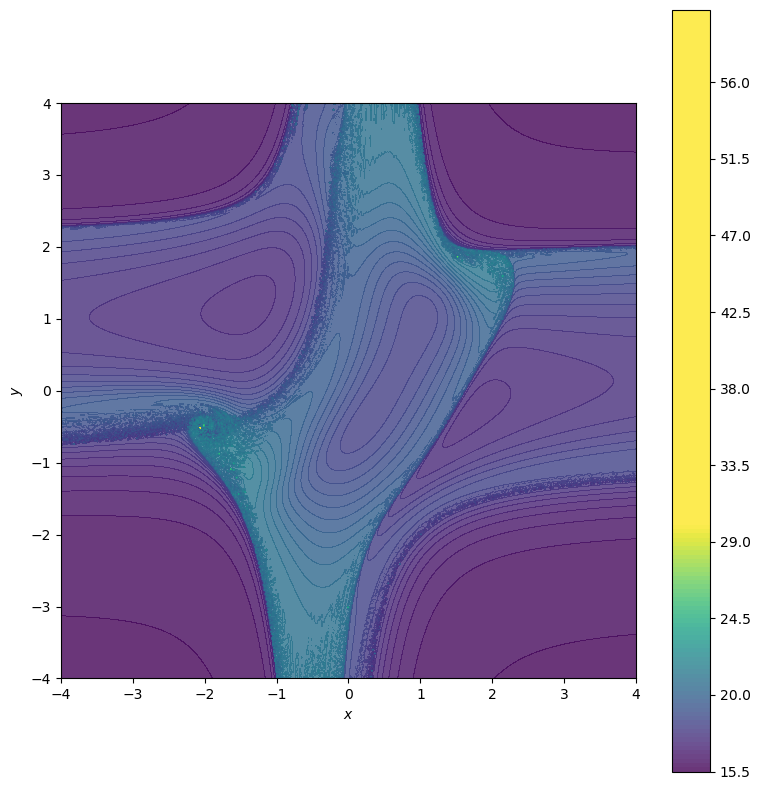

In [41]:
fig,ax = plt.subplots(1,1,figsize=(8,8),dpi=100,sharex=True, sharey=True)

# X, Y, lds.reshape(Nx, Ny)
c = ax.contourf(x, y, lds.reshape(Nx, Ny), cmap="viridis",levels=200, vmin=15.5, vmax=30,alpha=0.8, zorder=-10)

# lds_gradient = get_gradient_magnitude(lds.reshape(Nx, Ny))
# lds_gradient = np.gradient(lds.reshape(Nx, Ny),axis=1)

# ax.pcolor(X, Y, LDm, cmap='bwr')
# ax.contour(x, y, lds_gradient, cmap='spring',alpha=1,zorder=10)

#reference lines
# ax.plot([-6,6],[0,0],color="black",linestyle="--",lw=1,alpha=0.4)
# ax.plot([0,0],[-6,6],color="black",linestyle="--",lw=1,alpha=0.4)

ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_aspect("equal")
# ax.set_xlim(-5,5)
# ax.set_ylim(-5,5)

fig.colorbar(c)

fig.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


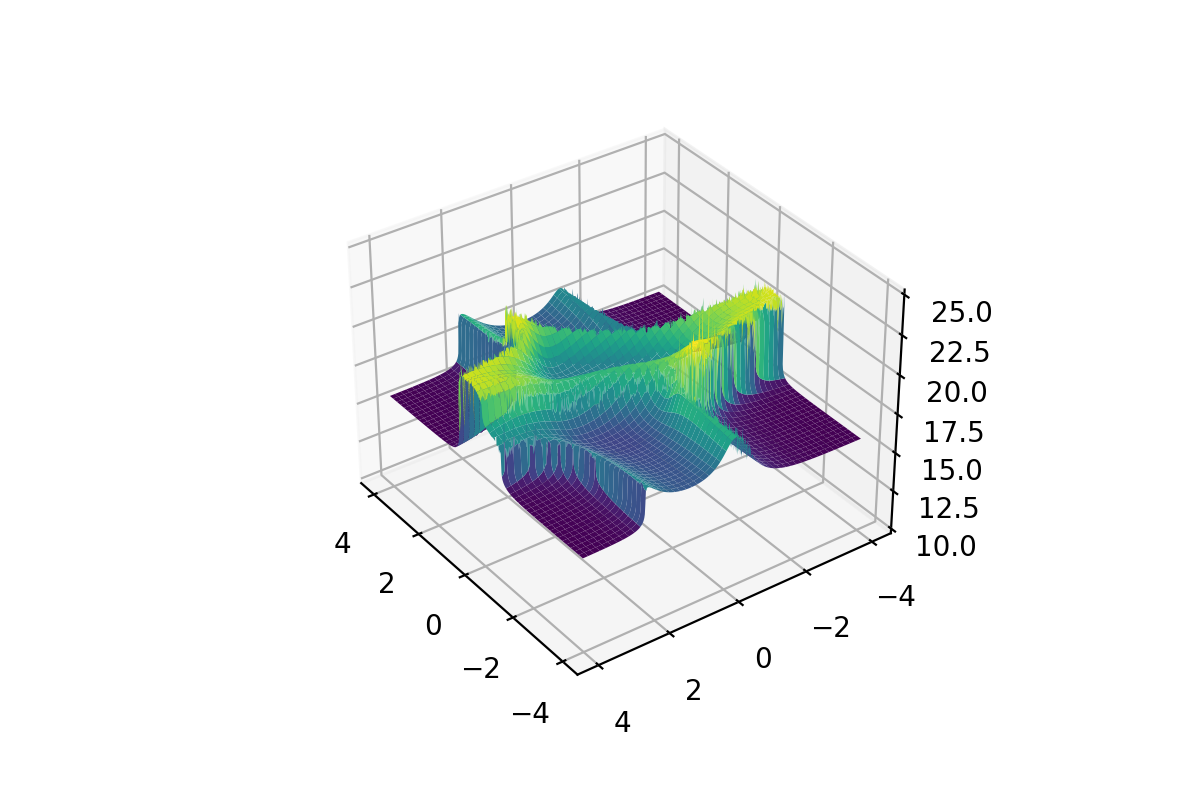

In [36]:
fig = plt.figure(dpi=200)
ax = fig.add_subplot(111, projection='3d')

cmap = plt.cm.viridis
# ax.scatter(X, Y, lds.reshape(Nx, Ny), c=cmap(lds))
surf = ax.plot_surface(X, Y, lds.reshape(Nx, Ny),cmap=cmap,linewidth=0)
# ax.cbar(surf)
# fig.colorbar(surf)
ax.set_zlim(10,25)
plt.show()

In [38]:
%matplotlib inline

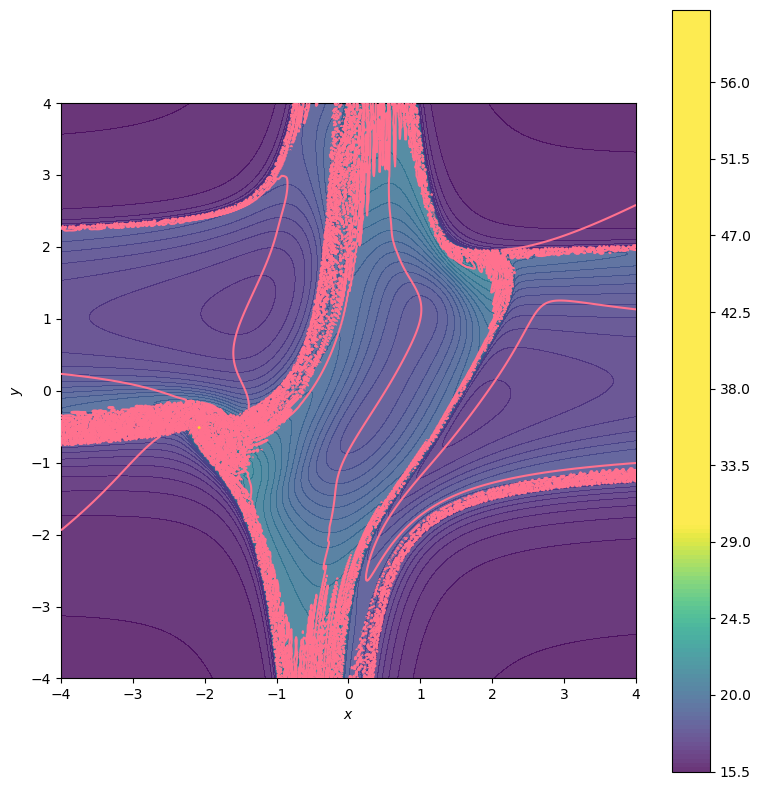

In [44]:
fig,ax = plt.subplots(1,1,figsize=(8,8),dpi=100,sharex=True, sharey=True)

# X, Y, lds.reshape(Nx, Ny)
c = ax.contourf(x, y, lds.reshape(Nx, Ny), cmap="viridis",levels=200, vmin=15.5, vmax=30,alpha=0.8, zorder=-10)

# lds_gradient = get_gradient_magnitude(lds.reshape(Nx, Ny))
lds_gradient = np.gradient(lds.reshape(Nx, Ny),axis=1)

# ax.pcolor(X, Y, LDm, cmap='bwr')
ax.contour(x, y, lds_gradient, cmap='spring',alpha=1,zorder=10)

#reference lines
# ax.plot([-6,6],[0,0],color="black",linestyle="--",lw=1,alpha=0.4)
# ax.plot([0,0],[-6,6],color="black",linestyle="--",lw=1,alpha=0.4)

ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_aspect("equal")
# ax.set_xlim(-5,5)
# ax.set_ylim(-5,5)

fig.colorbar(c)

fig.tight_layout()
plt.show()

In [81]:
from scipy.ndimage import laplace
tol = 0.0001
scalar = laplace(lds.reshape(Nx, Ny))
scalar = scalar/scalar.max()
scalar = scalar**2
LDm = np.ma.masked_where(scalar < tol, scalar )

/Users/ba13026/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  


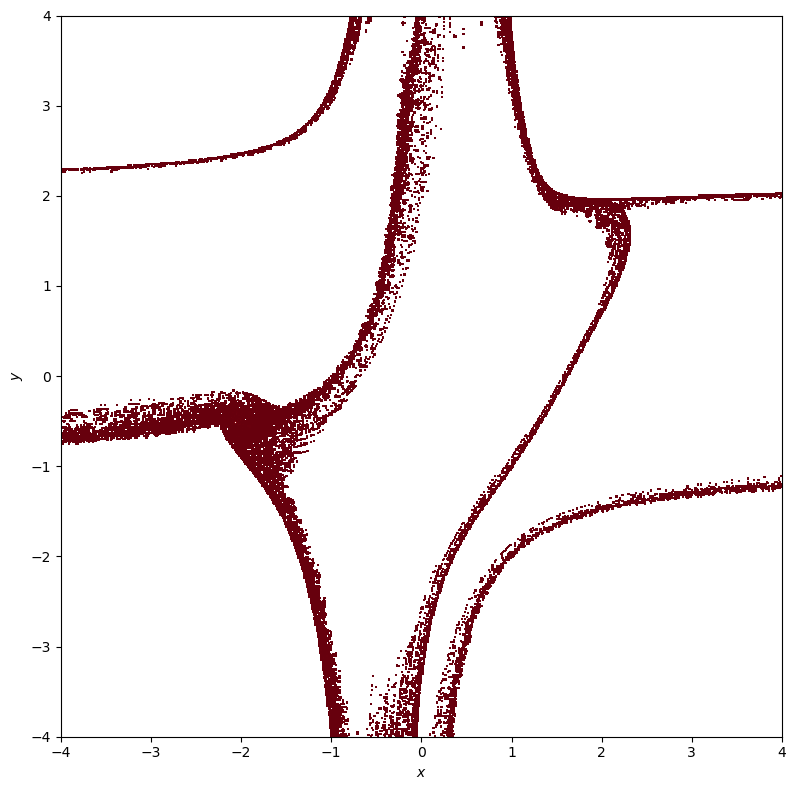

In [149]:
fig,ax = plt.subplots(1,1,figsize=(8,8),dpi=100,sharex=True, sharey=True)

# X, Y, lds.reshape(Nx, Ny)
# c = ax.contourf(x, y, lds.reshape(Nx, Ny), cmap="viridis",levels=200, vmin=15.5, vmax=30,alpha=0.8, zorder=-10)

# lds_gradient = get_gradient_magnitude(lds.reshape(Nx, Ny))

ax.pcolor(X, Y, LDm, cmap="Reds_r")
# ax.pcolor(x, y, scalar, cmap='jet',alpha=1,zorder=10)

#reference lines
# ax.plot([-6,6],[0,0],color="black",linestyle="--",lw=1,alpha=0.4)
# ax.plot([0,0],[-6,6],color="black",linestyle="--",lw=1,alpha=0.4)

ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_aspect("equal")
# ax.set_xlim(-5,5)
# ax.set_ylim(-5,5)

# fig.colorbar(c)

fig.tight_layout()
plt.show()

In [213]:
LDm.__dict__

{'_fill_value': array(1.e+20),
 '_hardmask': False,
 '_sharedmask': False,
 '_isfield': False,
 '_baseclass': numpy.ndarray,
 '_optinfo': {},
 '_basedict': {},
 '_mask': array([[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]])}

AttributeError: 'MaskedArray' object has no attribute 'meta'

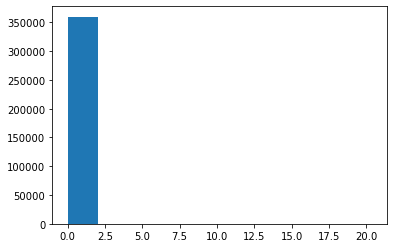

In [50]:
fig = plt.figure()
plt.hist(abs(lds_gradient).flatten())
plt.show()

This data can be potentially exploited to define a partitioning of the initial conditions of the trajectory dataset, and hence of all trajectories. 

### Lagragian Descriptor

Common input parameters

In [404]:
# Integration parameters
# tau = np.pi
tau = 10*np.pi/2

# LDp, p-value
p_value = 1/2

# Mesh parameters
x_min,x_max = [-6, 6]
y_min,y_max = [-6, 6]
Nx, Ny = [300, 300]

# for plotting
axis_x = np.linspace(x_min,x_max,Nx)
axis_y = np.linspace(y_min,y_max,Ny)
X, Y = np.meshgrid(axis_x, axis_y)

grid_parameters = [(x_min, x_max, Nx), (y_min, y_max, Ny)]
box_boundaries = False

Compute and plot LDs for four resonant cases

In [405]:
a, b, omega2, t0 = [1, 1, 1, 0]
vector_field = lambda t, u: Bohmian_velocity_field(t, u, PARAMETERS=[a, b, omega2, t0])

# compute total LD
LD_forward = compute_lagrangian_descriptor(grid_parameters,vector_field,tau,p_value,box_boundaries)
LD = LD_forward

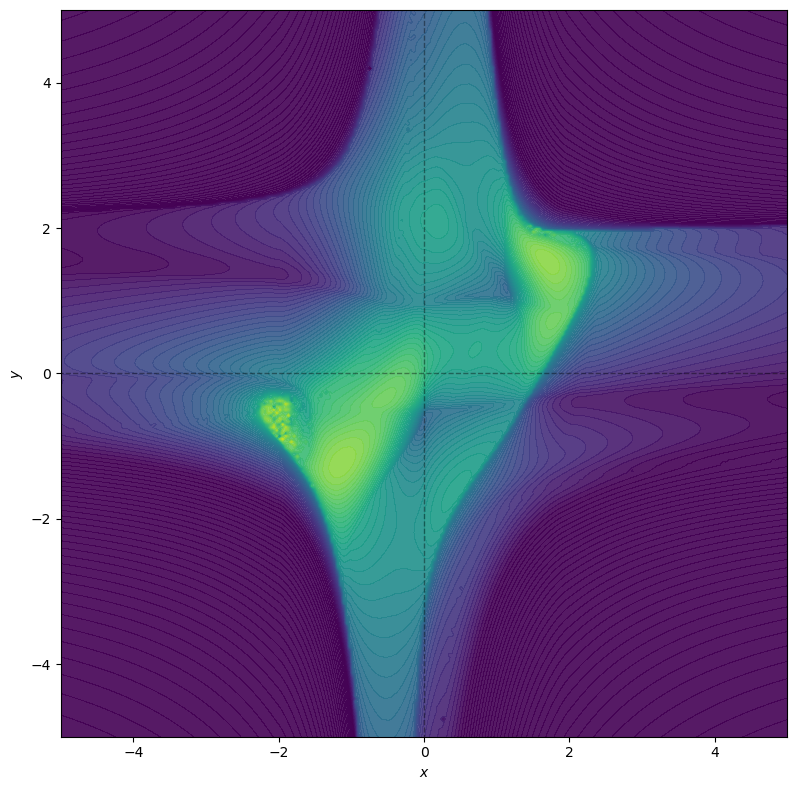

In [406]:
fig,ax = plt.subplots(1,1,figsize=(8,8),dpi=100,sharex=True, sharey=True)

c = ax.contourf(axis_x, axis_x, LD, cmap="viridis",levels=100, vmin=10,vmax=21,alpha=0.9)

#     # plot nodal lines: right branch
#     x_nodal = np.linspace(0.05, 6, 100); y_nodal = 1/(np.sqrt(N)*x_nodal)
#     ax.plot(x_nodal, y_nodal, color="black",lw=1.5,)
    
#     # plot nodal lines: left branch 
#     x_nodal = np.linspace(-0.05, -6, 100); y_nodal = 1/(np.sqrt(N)*x_nodal)
#     ax.plot(x_nodal, y_nodal, color="black",lw=1.5)
    
#     # plot invariant straight line
#     x_invariant = np.linspace(0.1,6,300)
#     y_invariant = x_invariant
#     curve = np.column_stack([x_invariant, y_invariant])
#     ax.plot(*curve.T,color="magenta")

#reference lines
ax.plot([-6,6],[0,0],color="black",linestyle="--",lw=1,alpha=0.4)
ax.plot([0,0],[-6,6],color="black",linestyle="--",lw=1,alpha=0.4)

# # Customise appearance
# title = "$\omega_1$ = 1, "+"$\omega_2 = $"+str(N)
# ax.set_title(title)

# if N == 1:
#     label_nodal = "$y_{nodal} = + 1/ x_{nodal}$"
# else:
#     label_nodal = "$y_{nodal} = + 1/ \sqrt{"+str(N)+"} x_{nodal}$"
# ax.plot([],[],color="black",lw=1.5,label=label_nodal)
# ax.legend(loc="lower left", fontsize=8)

# ax.scatter(0.75, 0.25, s=50, color="red", edgecolor="white", zorder=20)
# ax.scatter(-1, -1, s=50,  color="blueviolet", edgecolor="white", zorder=20)

ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_aspect("equal")
ax.set_xlim(-5,5)
ax.set_ylim(-5,5)

fig.colorbar(c)
fig.tight_layout()
plt.show()

Gradient

<IPython.core.display.Javascript object>


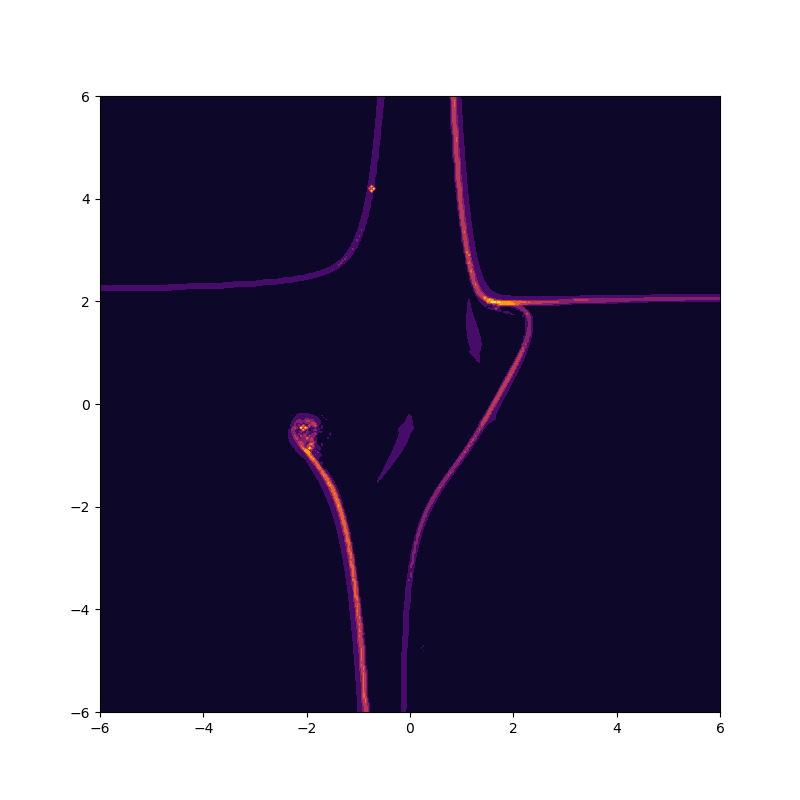

In [431]:
from scipy.ndimage import laplace
from ldds.tools import get_gradient_magnitude

fig,ax = plt.subplots(1,1,figsize=(8,8),dpi=100,sharex=True, sharey=True)

tol = 0.01
#compute laplacian
LD = LD_forward
# scalar = laplace(LD)
# scalar = scalar/scalar.max()
# scalar = scalar**2
# LDm = np.ma.masked_where(scalar < tol, scalar )

LD_gradient = get_gradient_magnitude(LD)

# ax.pcolor(X, Y, LDm, cmap='bwr')
ax.contourf(axis_x, axis_y, LD_gradient, cmap='inferno')
# ax.pcolor(X,Y, LD_gradient, cmap='bwr')

plt.show()

Overlaied version

<IPython.core.display.Javascript object>


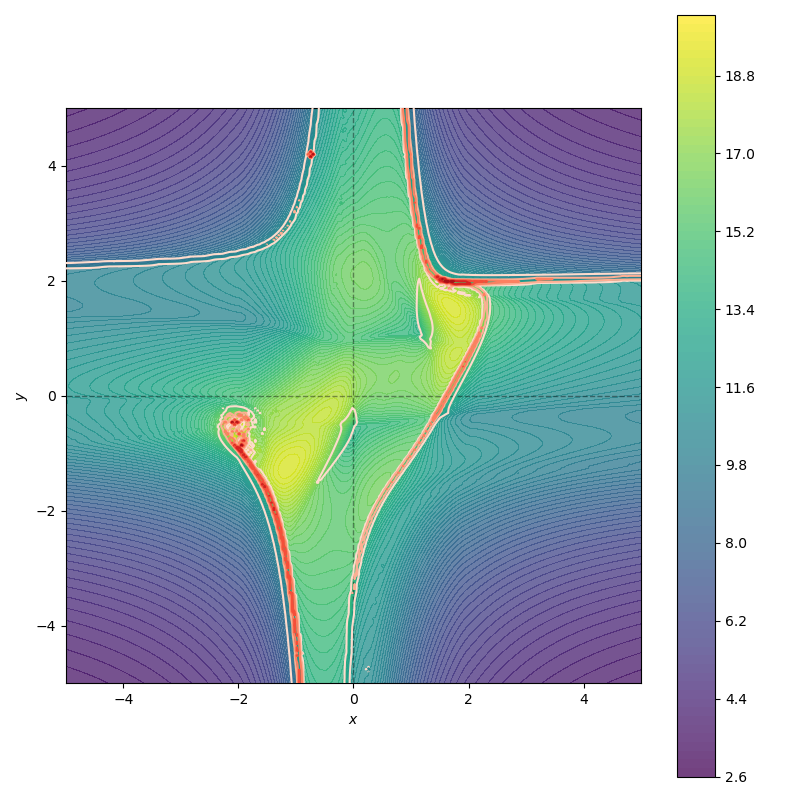

In [433]:
fig,ax = plt.subplots(1,1,figsize=(8,8),dpi=100,sharex=True, sharey=True)

c = ax.contourf(axis_x, axis_x, LD, cmap="viridis",levels=100, alpha=0.75, zorder=-10)
LD_gradient = get_gradient_magnitude(LD)
# ax.pcolor(X, Y, LDm, cmap='bwr')
ax.contour(axis_x, axis_y, LD_gradient, cmap='Reds', zorder=10)

#reference lines
ax.plot([-6,6],[0,0],color="black",linestyle="--",lw=1,alpha=0.4)
ax.plot([0,0],[-6,6],color="black",linestyle="--",lw=1,alpha=0.4)

ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_aspect("equal")
ax.set_xlim(-5,5)
ax.set_ylim(-5,5)

fig.colorbar(c)

fig.tight_layout()
plt.show()

## Example 2: $(1, 1, 1, 1/\sqrt{2}) = (a, b, \omega_1, \omega_2)$

### Nodal lines: 2D plot

In [100]:
import numpy as np
import matplotlib.pyplot as plt

In [101]:
a, b, omega1, omega2 = (1, 1, 1, 1/np.sqrt(2))

In [102]:
t_span = (0.0001, 4*np.pi/omega2); Nt = 1000
t = np.linspace(*t_span, Nt)

In [103]:
x_nodal = -np.sin(t*(omega1+omega2))/(a*np.sqrt(omega1)*np.sin(omega2*t))
y_nodal = -a*np.sin(omega1*t)/(b*np.sqrt(omega2)*np.sin(t*(omega1+omega2)))

<IPython.core.display.Javascript object>


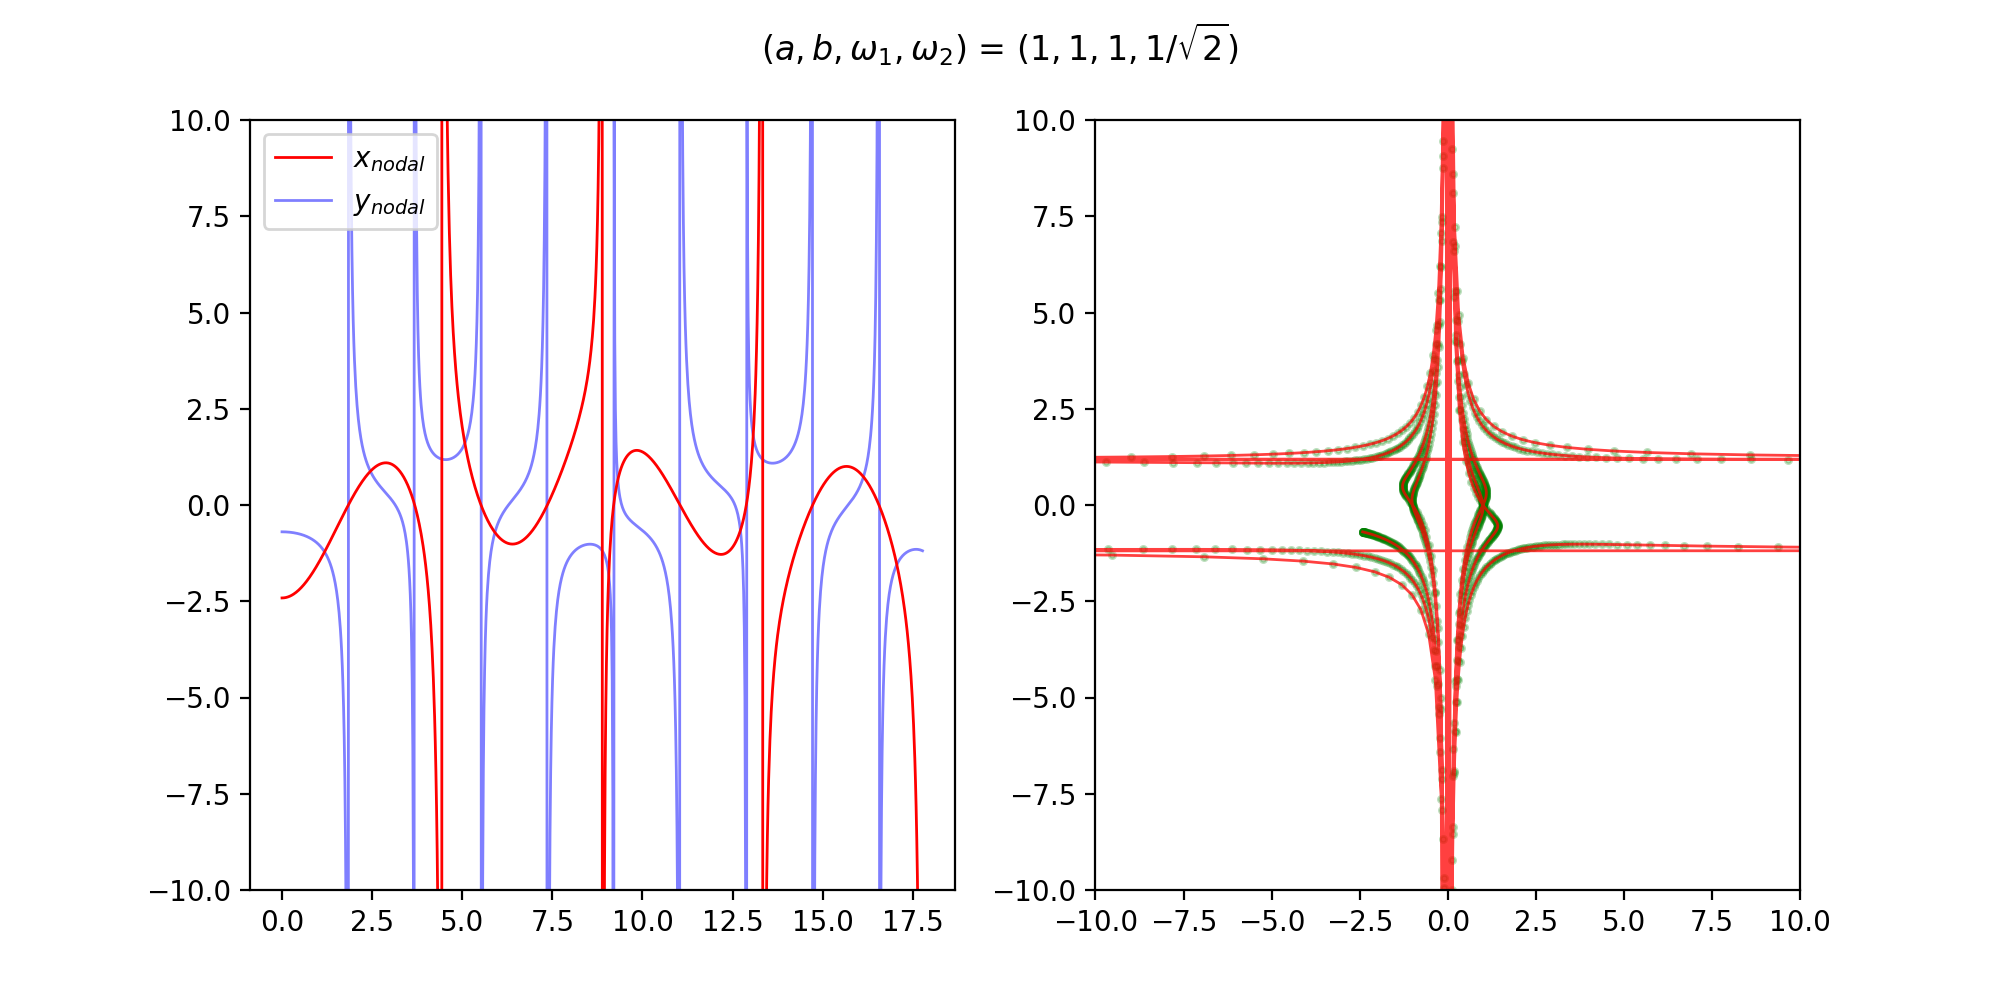

In [104]:
fig,(ax1, ax2) = plt.subplots(1,2, figsize=(10,5),dpi=200)

ax1.plot(t, x_nodal,c="red",lw=1,label="$x_{nodal}$",alpha=1)
ax1.plot(t, y_nodal,c="blue",lw=1,label="$y_{nodal}$",alpha=0.5,zorder=-10)
ax1.set_ylim(-10,10)
ax1.legend()

ax2.scatter(x_nodal, y_nodal,c="green",s=5,alpha=0.25)
ax2.plot(x_nodal, y_nodal,c="red",lw=1,alpha=0.75)

ax2.set_ylim(-10,10)
ax2.set_xlim(-10,10)

suptitle = "($a, b, \omega_1, \omega_2$) = ($"+str(a)+", "+str(b)+", "+str(omega1)+","+"1/\sqrt{2}"+"$)"
fig.suptitle(suptitle)

plt.show()

### Nodal lines: 3D plot

In [105]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

<IPython.core.display.Javascript object>


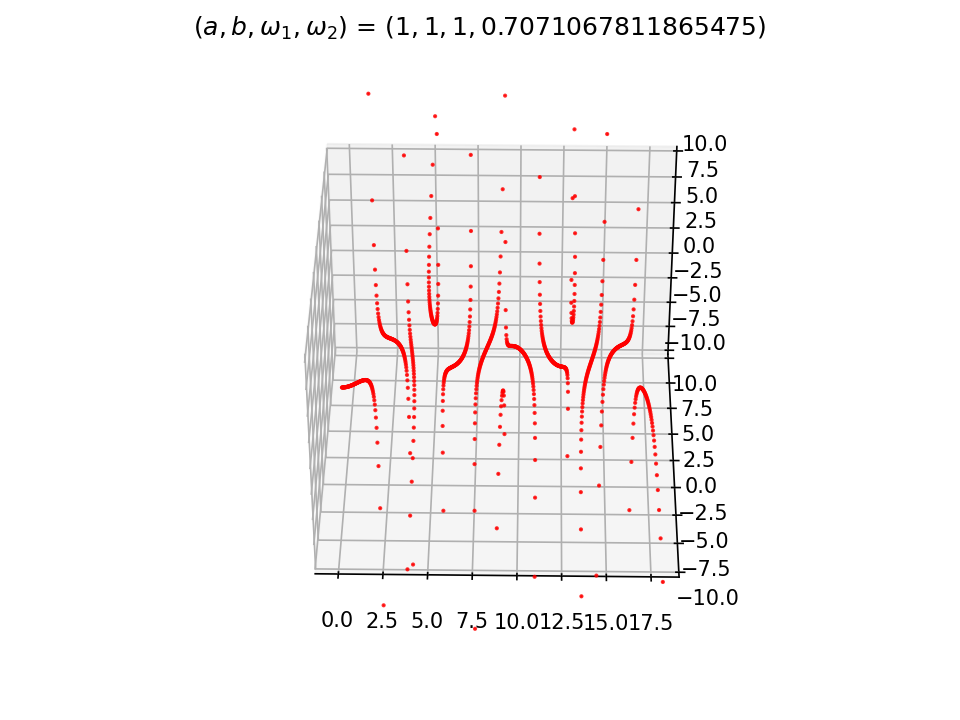

In [108]:
fig = plt.figure(dpi=150)
ax = fig.add_subplot(111, projection='3d')

# ax.plot(t, x_nodal, y_nodal, color="green", lw=1)
ax.scatter(t, x_nodal, y_nodal, color="red", s=1)

ax.set_zlim(-10,10)
ax.set_ylim(-10,10)

suptitle = "($a, b, \omega_1, \omega_2$) = ($"+str(a)+", "+str(b)+", "+str(omega1)+","+str(omega2)+"$)"
fig.suptitle(suptitle)

plt.show()

### Lagragian Descriptor

Common input parameters

In [114]:
# Integration parameters
tau = 4*np.pi/omega2

# LDp, p-value
p_value = 1/2

# Mesh parameters
x_min,x_max = [-6, 6]
y_min,y_max = [-6, 6]
Nx, Ny = [300, 300]

grid_parameters = [(x_min, x_max, Nx), (y_min, y_max, Ny)]
box_boundaries = False

Compute and plot LDs for four resonant cases

In [115]:
x = np.linspace(x_min,x_max,Nx)
y = np.linspace(y_min,y_max,Ny)

a, b, omega2, t0 = [1, 1, 1/np.sqrt(2), 0]
vector_field = lambda t, u: Bohmian_velocity_field(t, u, PARAMETERS=[a, b, omega2, t0])

# compute total LD
LD_forward = compute_lagrangian_descriptor(grid_parameters,vector_field,tau,p_value,box_boundaries)
LD = LD_forward

<IPython.core.display.Javascript object>


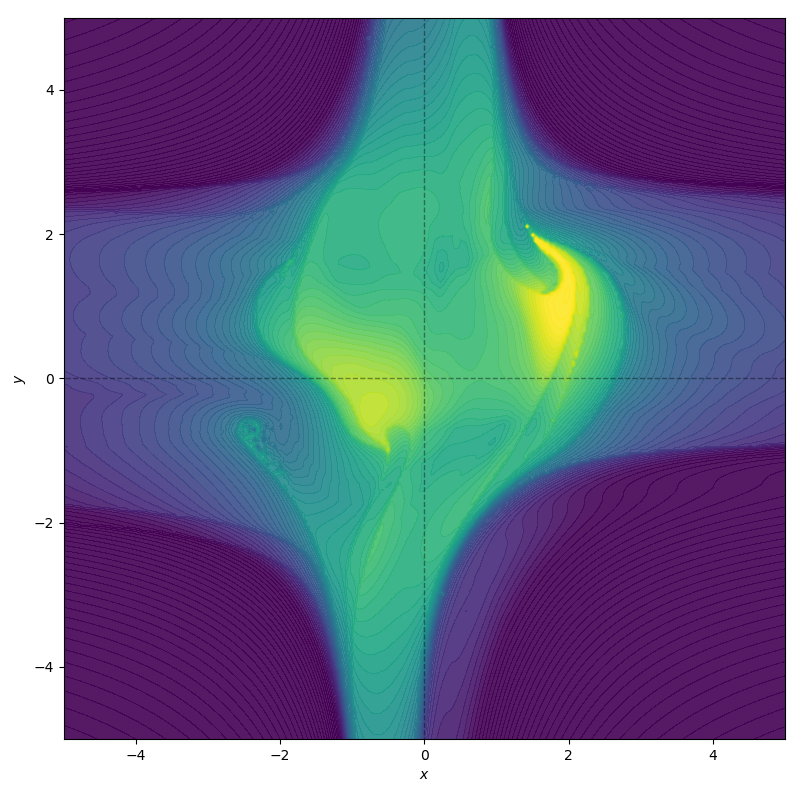

In [116]:
fig,ax = plt.subplots(1,1,figsize=(8,8),dpi=100,sharex=True, sharey=True)

c = ax.contourf(x, y, LD, cmap="viridis",levels=100, vmin=10,vmax=21,alpha=0.9)

#reference lines
ax.plot([-6,6],[0,0],color="black",linestyle="--",lw=1,alpha=0.4)
ax.plot([0,0],[-6,6],color="black",linestyle="--",lw=1,alpha=0.4)

ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_aspect("equal")
ax.set_xlim(-5,5)
ax.set_ylim(-5,5)

fig.tight_layout()
plt.show()

## Resonant cases

### Case $(\omega_1, \omega_2) = (1, k^+)$

<IPython.core.display.Javascript object>


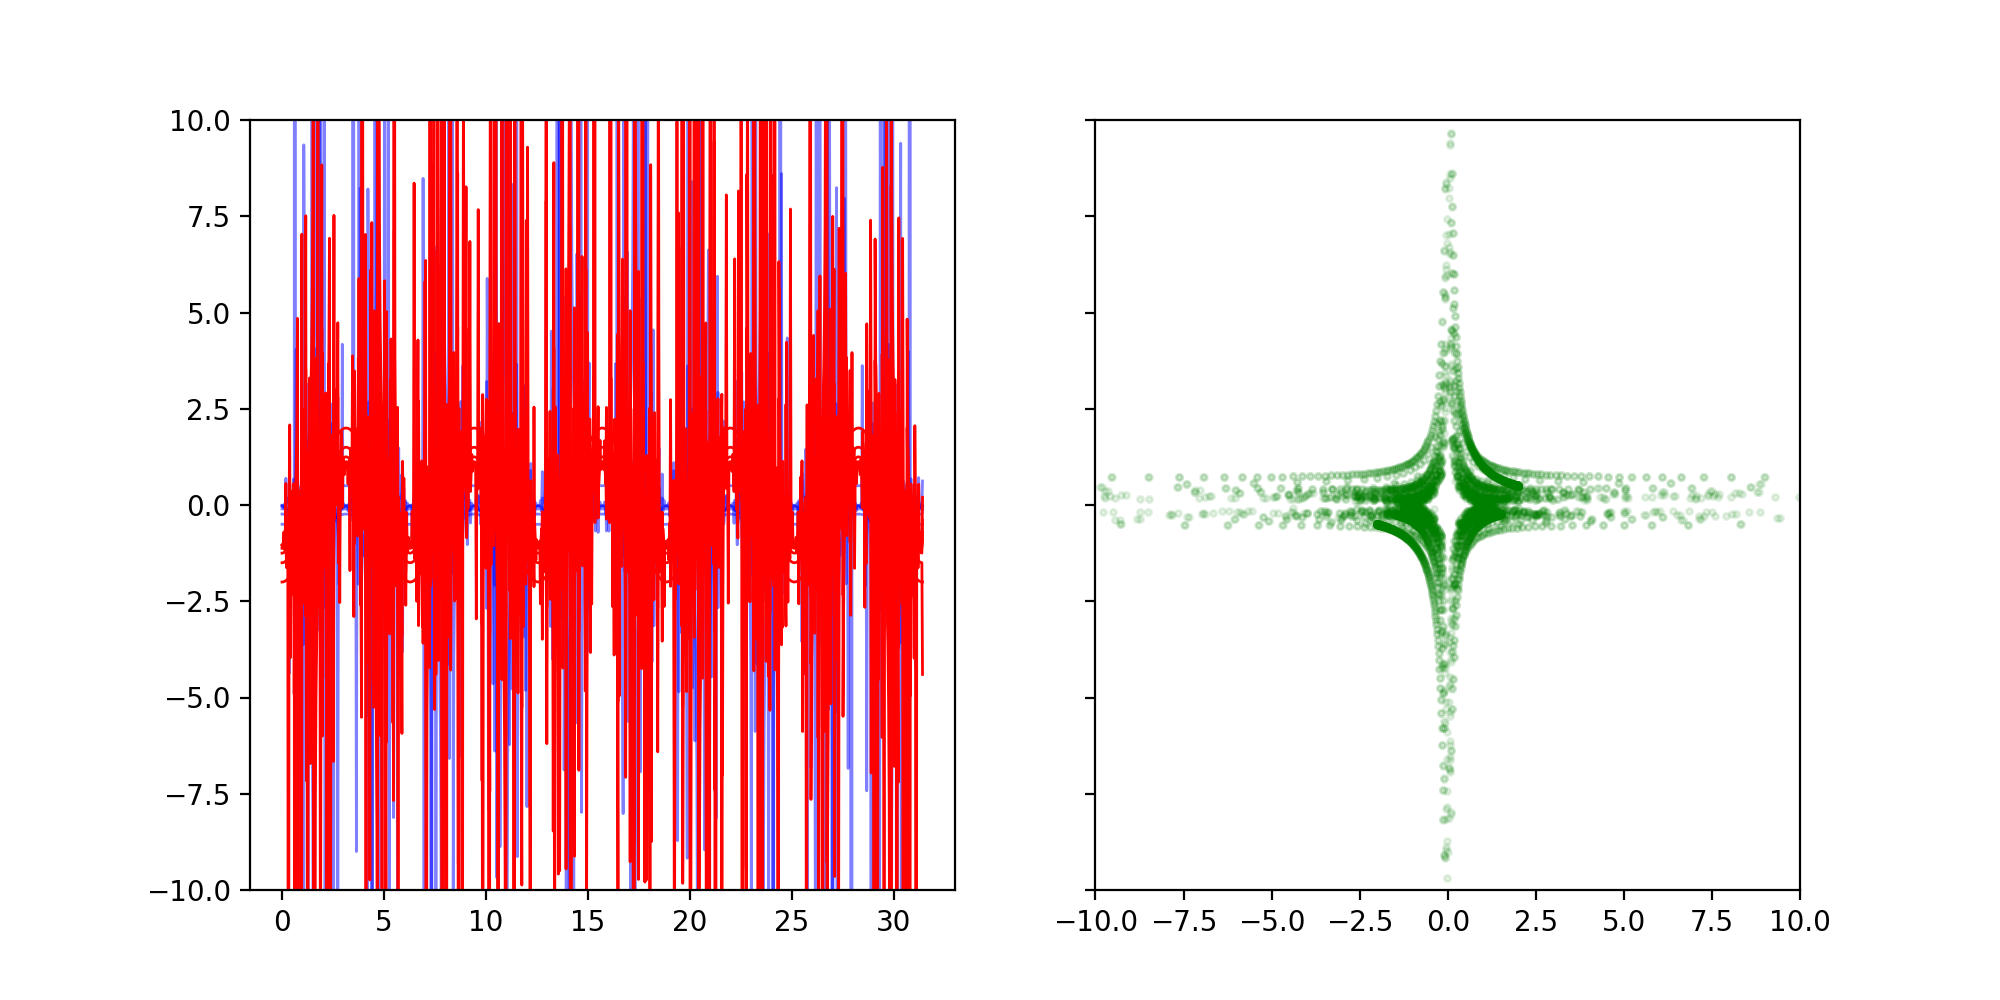

In [44]:
fig,(ax1, ax2) = plt.subplots(1,2, figsize=(10,5),sharey=True,dpi=200)

for omega2 in [1, 2, 4, 8, 16, 30]:

#     a, b, omega2 = (1, 1, 1/np.sqrt(2))
    a, b, omega1 = (1, 1, 1)

    # t_span = (0.0001, 10*np.pi/omega2); Nt = 1000
    t_span = (0.0001, 10*np.pi); Nt = 1000
    t = np.linspace(*t_span, Nt)

    x_nodal = -np.sin(t*(omega1+omega2))/(a*np.sqrt(omega1)*np.sin(omega2*t))
    y_nodal = -a*np.sin(omega1*t)/(b*np.sqrt(omega2)*np.sin(t*(omega1+omega2)))

    

    ax1.plot(t, x_nodal,c="red",lw=1,label="$x_{nodal}$",alpha=1)
    ax1.plot(t, y_nodal,c="blue",lw=1,label="$y_{nodal}$",alpha=0.5,zorder=-10)
    
#     ax1.legend()

    ax2.scatter(x_nodal, y_nodal,c="green",s=5,alpha=0.1)
#     ax2.plot(x_nodal, y_nodal,c="black",lw=1,alpha=0.1)

ax1.set_ylim(-10,10)
ax2.set_xlim(-10,10)

# suptitle = "($a, b, \omega_1, \omega_2$) = ($"+str(a)+", "+str(b)+", "+str(omega1)+","+str(omega2)+"$)"
# fig.suptitle(suptitle)

plt.show()

In [41]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

<IPython.core.display.Javascript object>


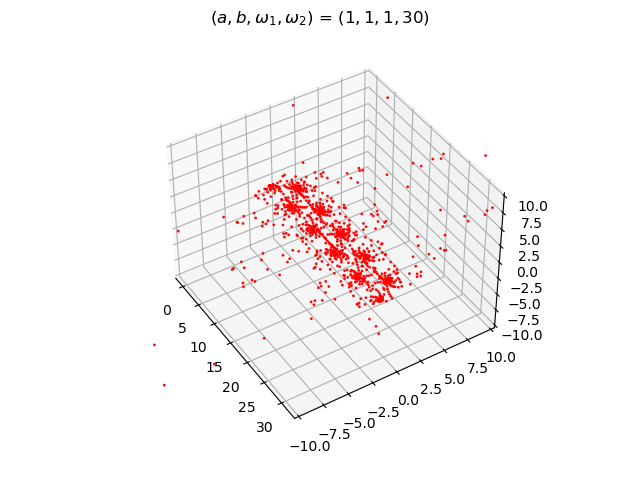

In [46]:
fig = plt.figure(dpi=100)
ax = fig.add_subplot(111, projection='3d')

# ax.plot(t, x_nodal, y_nodal, color="green", lw=1)
ax.scatter(t, x_nodal, y_nodal, color="red", s=1)

ax.set_zlim(-10,10)
ax.set_ylim(-10,10)

suptitle = "($a, b, \omega_1, \omega_2$) = ($"+str(a)+", "+str(b)+", "+str(omega1)+","+str(omega2)+"$)"
fig.suptitle(suptitle)

plt.show()

### Case $(\omega_1, \omega_2) = (k^+, 1)$

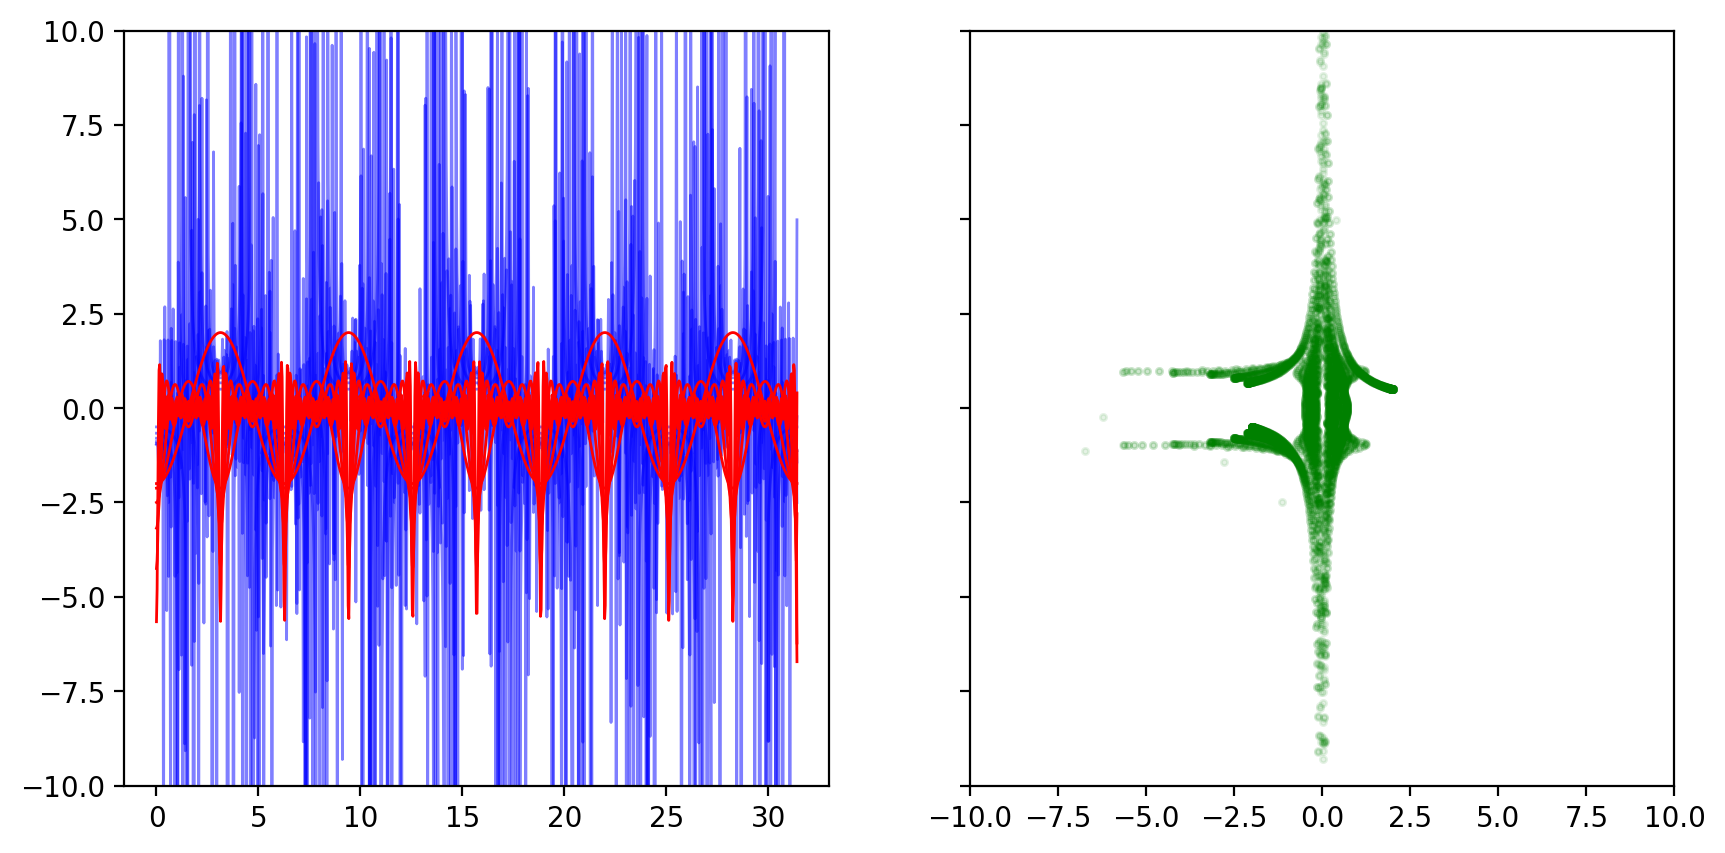

In [102]:
fig,(ax1, ax2) = plt.subplots(1,2, figsize=(10,5),sharey=True,dpi=200)

for omega1 in [1, 2, 4, 8, 16, 30]:

#     a, b, omega2 = (1, 1, 1/np.sqrt(2))
    a, b, omega2 = (1, 1, 1)

    # t_span = (0.0001, 10*np.pi/omega2); Nt = 1000
    t_span = (0.0001, 10*np.pi); Nt = 1000
    t = np.linspace(*t_span, Nt)

    x_nodal = -np.sin(t*(omega1+omega2))/(a*np.sqrt(omega1)*np.sin(omega2*t))
    y_nodal = -a*np.sin(omega1*t)/(b*np.sqrt(omega2)*np.sin(t*(omega1+omega2)))

    

    ax1.plot(t, x_nodal,c="red",lw=1,label="$x_{nodal}$",alpha=1)
    ax1.plot(t, y_nodal,c="blue",lw=1,label="$y_{nodal}$",alpha=0.5,zorder=-10)
    
#     ax1.legend()

    ax2.scatter(x_nodal, y_nodal,c="green",s=5,alpha=0.1)
#     ax2.plot(x_nodal, y_nodal,c="black",lw=1,alpha=0.1)

ax1.set_ylim(-10,10)
ax2.set_xlim(-10,10)

# suptitle = "($a, b, \omega_1, \omega_2$) = ($"+str(a)+", "+str(b)+", "+str(omega1)+","+str(omega2)+"$)"
# fig.suptitle(suptitle)

plt.show()

## Non-resonant cases

### Case $(\omega_1, \omega_2) = (1/\sqrt{2}, k^+)$

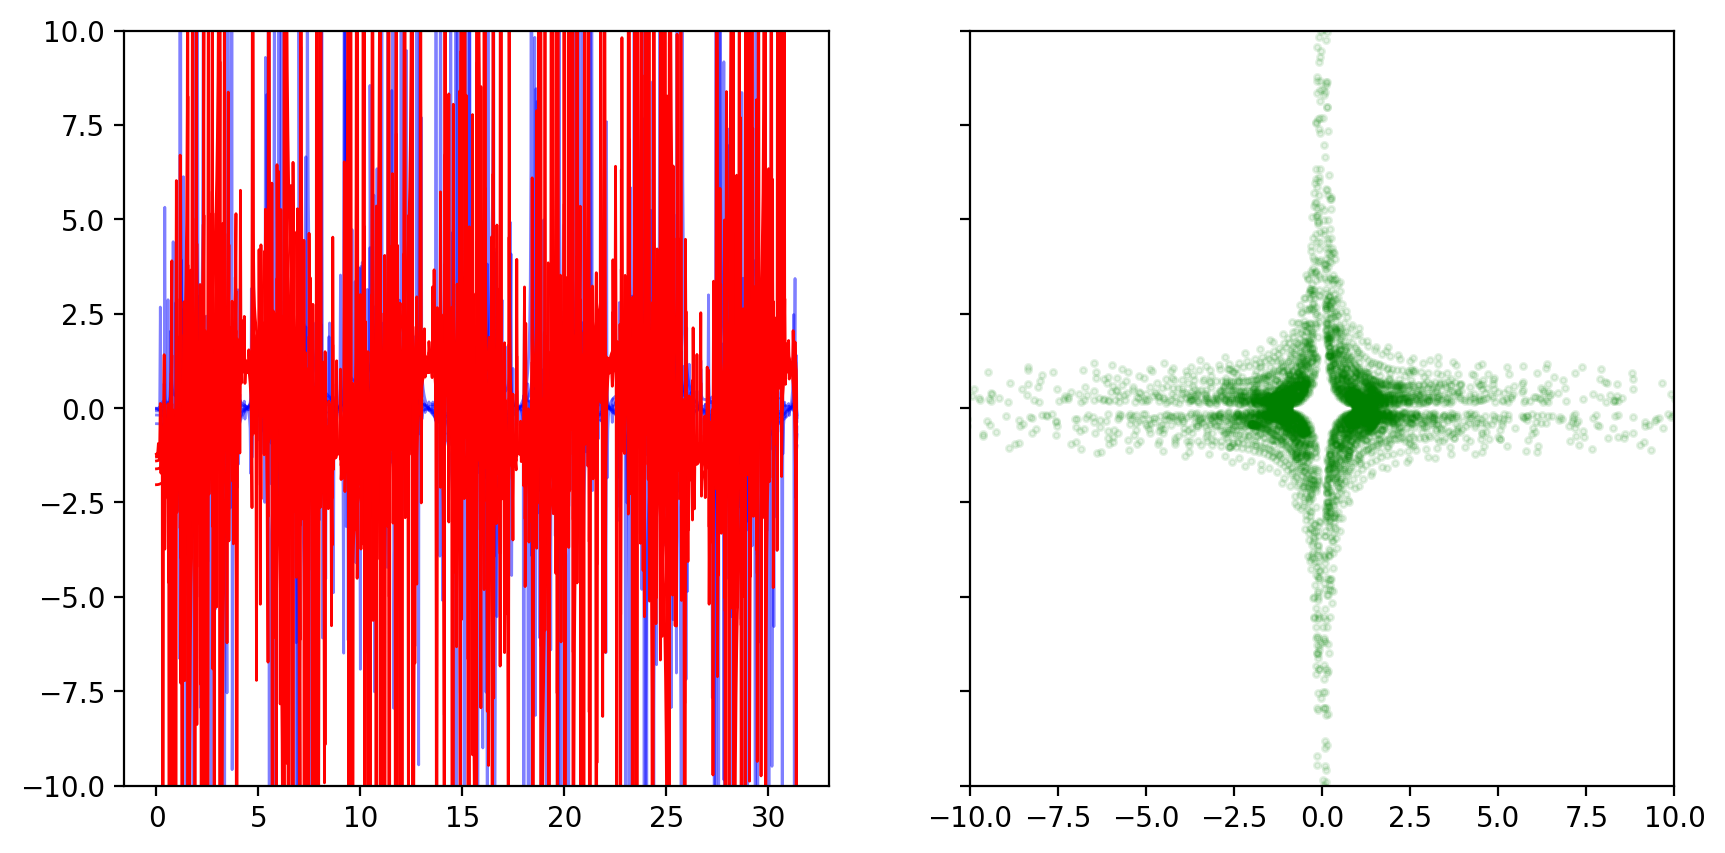

In [99]:
fig,(ax1, ax2) = plt.subplots(1,2, figsize=(10,5),sharey=True,dpi=200)

for omega2 in [1, 2, 4, 8, 16, 30]:

    a, b, omega1 = (1, 1, 1/np.sqrt(2))

    # t_span = (0.0001, 10*np.pi/omega2); Nt = 1000
    t_span = (0.0001, 10*np.pi); Nt = 1000
    t = np.linspace(*t_span, Nt)

    x_nodal = -np.sin(t*(omega1+omega2))/(a*np.sqrt(omega1)*np.sin(omega2*t))
    y_nodal = -a*np.sin(omega1*t)/(b*np.sqrt(omega2)*np.sin(t*(omega1+omega2)))

    

    ax1.plot(t, x_nodal,c="red",lw=1,label="$x_{nodal}$",alpha=1)
    ax1.plot(t, y_nodal,c="blue",lw=1,label="$y_{nodal}$",alpha=0.5,zorder=-10)
    
#     ax1.legend()

    ax2.scatter(x_nodal, y_nodal,c="green",s=5,alpha=0.1)
#     ax2.plot(x_nodal, y_nodal,c="black",lw=1,alpha=0.1)

ax1.set_ylim(-10,10)
ax2.set_xlim(-10,10)

# suptitle = "($a, b, \omega_1, \omega_2$) = ($"+str(a)+", "+str(b)+", "+str(omega1)+","+str(omega2)+"$)"
# fig.suptitle(suptitle)

plt.show()

### Case $(\omega_1, \omega_2) = (k^+, 1/\sqrt{2})$

<IPython.core.display.Javascript object>


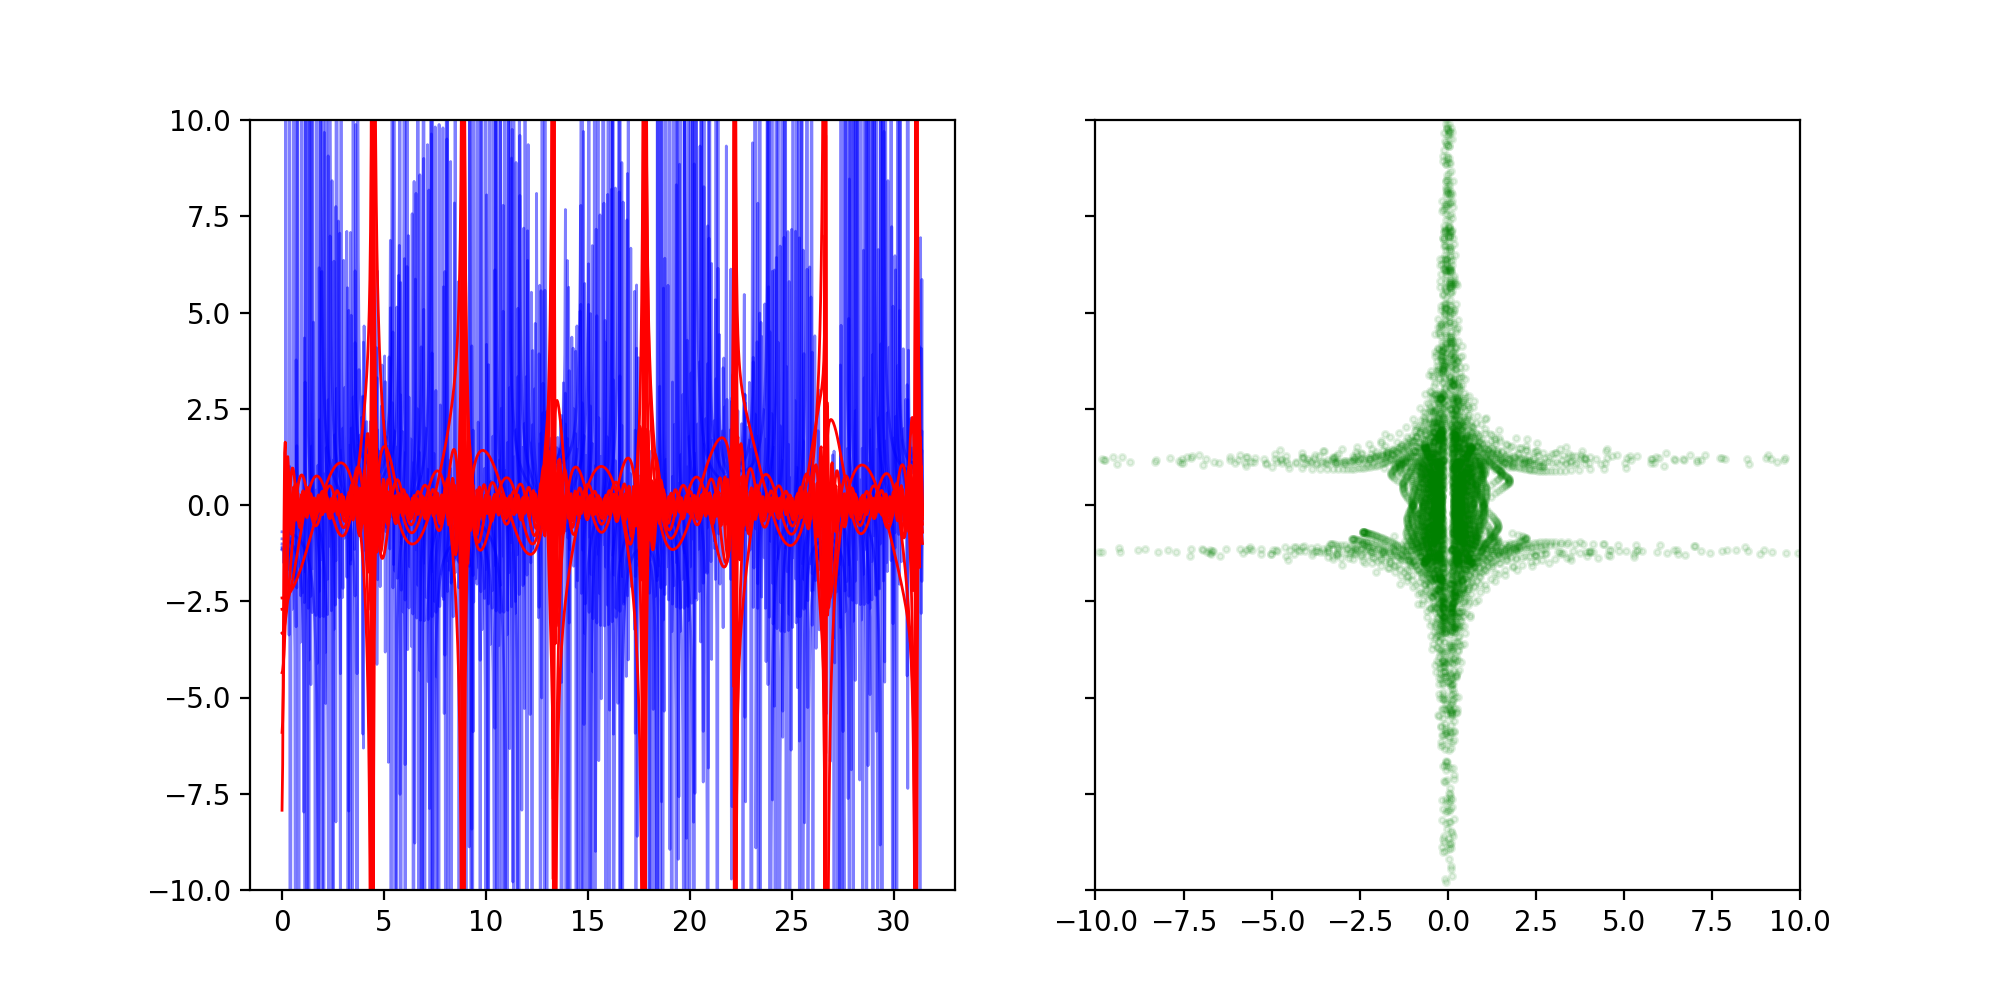

In [47]:
fig,(ax1, ax2) = plt.subplots(1,2, figsize=(10,5),sharey=True,dpi=200)

for omega1 in [1, 2, 4, 8, 16, 30]:

    a, b, omega2 = (1, 1, 1/np.sqrt(2))

    # t_span = (0.0001, 10*np.pi/omega2); Nt = 1000
    t_span = (0.0001, 10*np.pi); Nt = 1000
    t = np.linspace(*t_span, Nt)

    x_nodal = -np.sin(t*(omega1+omega2))/(a*np.sqrt(omega1)*np.sin(omega2*t))
    y_nodal = -a*np.sin(omega1*t)/(b*np.sqrt(omega2)*np.sin(t*(omega1+omega2)))

    

    ax1.plot(t, x_nodal,c="red",lw=1,label="$x_{nodal}$",alpha=1)
    ax1.plot(t, y_nodal,c="blue",lw=1,label="$y_{nodal}$",alpha=0.5,zorder=-10)
    
#     ax1.legend()

    ax2.scatter(x_nodal, y_nodal,c="green",s=5,alpha=0.1)
#     ax2.plot(x_nodal, y_nodal,c="black",lw=1,alpha=0.1)

ax1.set_ylim(-10,10)
ax2.set_xlim(-10,10)

# suptitle = "($a, b, \omega_1, \omega_2$) = ($"+str(a)+", "+str(b)+", "+str(omega1)+","+str(omega2)+"$)"
# fig.suptitle(suptitle)

plt.show()

<IPython.core.display.Javascript object>


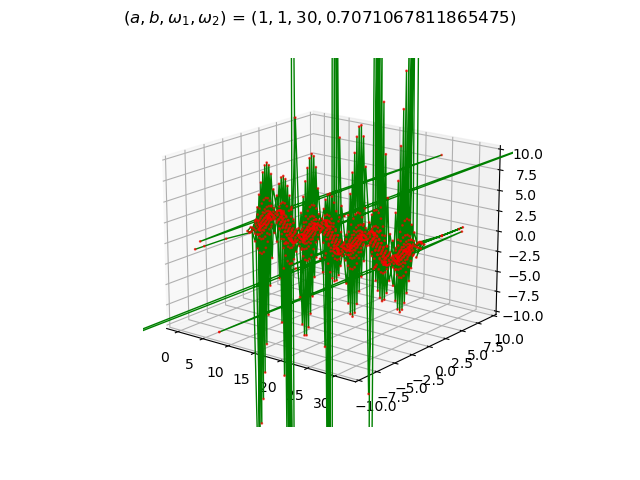

In [48]:
fig = plt.figure(dpi=100)
ax = fig.add_subplot(111, projection='3d')

ax.plot(t, x_nodal, y_nodal, color="green", lw=1)
ax.scatter(t, x_nodal, y_nodal, color="red", s=1)

ax.set_zlim(-10,10)
ax.set_ylim(-10,10)

suptitle = "($a, b, \omega_1, \omega_2$) = ($"+str(a)+", "+str(b)+", "+str(omega1)+","+str(omega2)+"$)"
fig.suptitle(suptitle)

plt.show()

# Test

Tutorial

https://scikit-image.org/docs/stable/auto_examples/segmentation/plot_mask_slic.html#sphx-glr-auto-examples-segmentation-plot-mask-slic-py

In [169]:
import matplotlib.pyplot as plt

from skimage import data
from skimage import color
from skimage import morphology
from skimage import segmentation

# Input data
img = data.immunohistochemistry()

# Compute a mask
lum = color.rgb2gray(img)
mask = morphology.remove_small_holes(
    morphology.remove_small_objects(
        lum < 0.7, 500),
    500)

mask = morphology.opening(mask, morphology.disk(3))

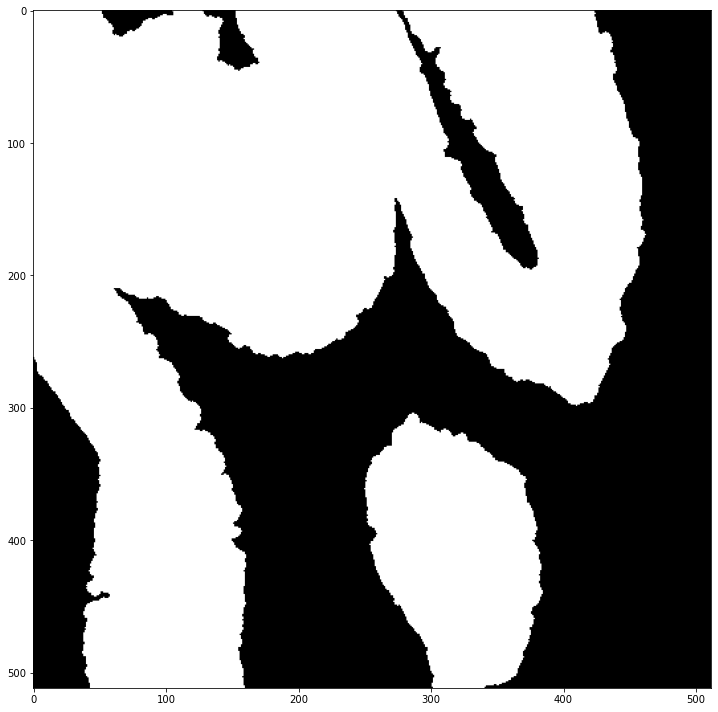

In [170]:
fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(10, 10))
ax.imshow(mask, cmap="gray")
plt.tight_layout()
plt.show()

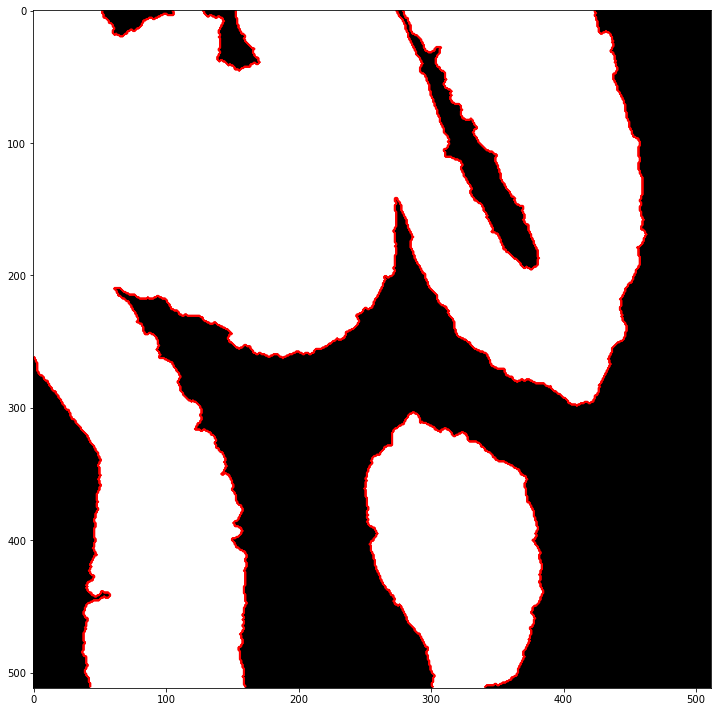

In [143]:
fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(10, 10))
ax.imshow(mask, cmap="gray")
boundaries = ax.contour(mask, colors='red', linewidths=1)
plt.tight_layout()
plt.show()

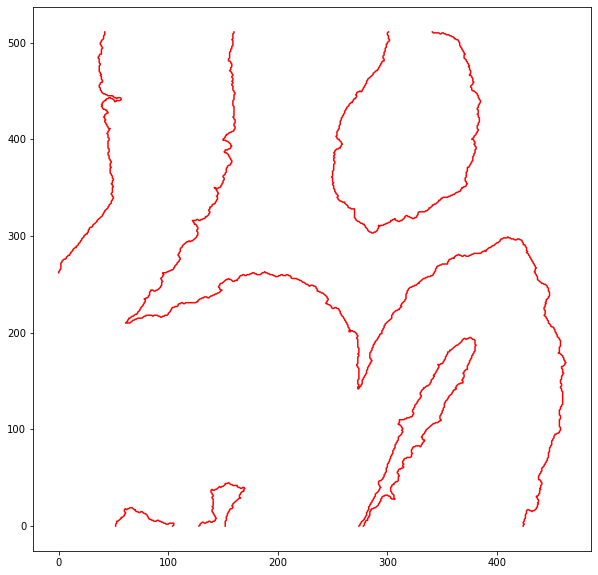

In [148]:
fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(10, 10))

for i in range(len(boundaries.allsegs[0])):
    if len(boundaries.allsegs[i]) > 0:
        data = boundaries.allsegs[0][i]
        ax.plot(*np.array(data).T, color="red")
        
plt.show()

LD plot

In [255]:
import matplotlib.pyplot as plt

from skimage import data
from skimage import color
from skimage import morphology
from skimage import segmentation

# Input data
lum = LDm.data
# tol = 0.0001
tol = 0.00001
mask = morphology.remove_small_holes(
    morphology.remove_small_objects(
        lum < tol, 600),
    600)

mask = morphology.opening(mask, morphology.disk(3))

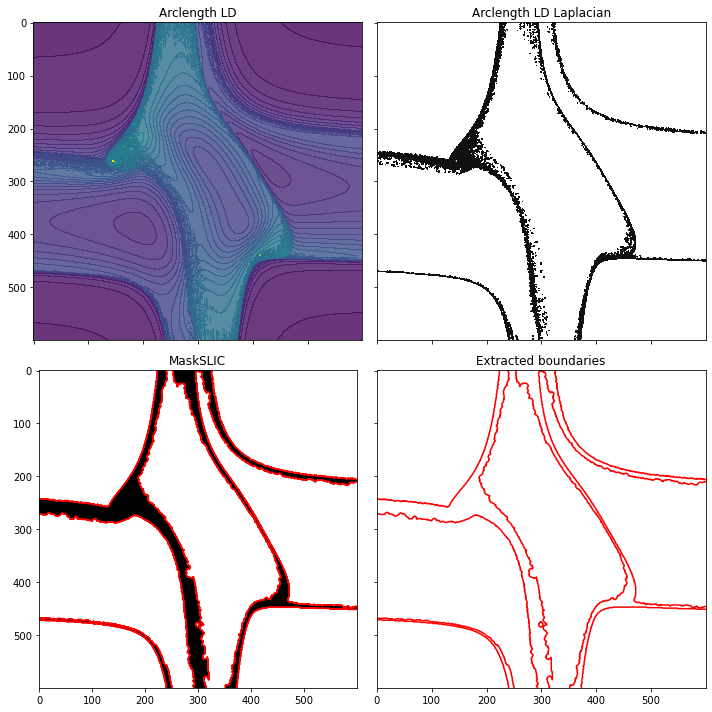

In [262]:
fig, ax = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10, 10))

ax[0][0].contourf(lds.reshape(Nx, Ny), cmap="viridis",levels=200, vmin=15.5, vmax=30,alpha=0.8, zorder=-10)
ax[0][0].set_title("Arclength LD")

ax[0][1].contourf(LDm, cmap="gray")
ax[0][1].set_title("Arclength LD Laplacian")

ax[1][0].imshow(mask, cmap="gray")
boundaries = ax[1][0].contour(mask, colors='red', linewidths=1)
ax[1][0].set_title("MaskSLIC")

for i in range(len(boundaries.allsegs[0])):
    if len(boundaries.allsegs[0][i]) > 0:
        data = boundaries.allsegs[0][i]
        ax[1][1].plot(*np.array(data).T, color="red")

ax[1][1].set_title("Extracted boundaries")
    
plt.tight_layout()
plt.show()

Turn boundaries into sets

In [181]:
boundary_segments = []

for i in range(len(boundaries.allsegs[0])):
    if len(boundaries.allsegs[i]) > 0:
        data = boundaries.allsegs[0][i]
        boundary_segments.append(data)

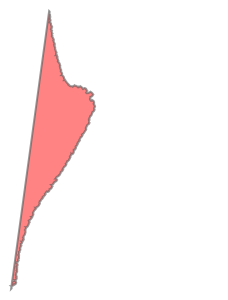

In [204]:
from shapely import geometry

poly = geometry.Polygon([p for p in list(boundary_segments[1])])
poly

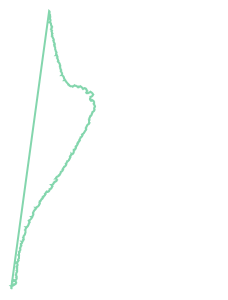

In [205]:
poly.boundary